In [2]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [3]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [4]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [5]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A

In [6]:
def ternary_search_h(a, b, func, yk, grad_yk):
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(yk - c * grad_yk) >= func(yk - d * grad_yk):
            a = c
        else:
            b = d 
    return a

In [7]:
def ternary_search_bet(a, b, xk, vk, func):
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(vk + c * (xk - vk)) >= func(vk + d * (xk - vk)):
            a = c
        else:
            b = d 
    return a

In [17]:
def AGMsDR(x0, iters, func, grad):
    xk = x0.copy()
    vk = x0.copy()
    Ak = 0
    res = [func(xk)]
    for i in range(iters):
        betk = ternary_search_bet(0, 1, xk, vk, func)
        yk = vk + betk * (xk - vk)
        grad_yk = grad(yk)
        hk = ternary_search_h(0, 1e5, func, yk, grad_yk)
        xk = yk - hk * grad_yk
        
        func_yk = func(yk)
        func_xk = func(xk)
        tmp = (func_yk - func_xk)**2 + 2 * Ak * np.linalg.norm(grad_yk)**2
        ak = (func_yk - func_xk + (tmp)**0.5) / np.linalg.norm(grad_yk)**2
        Ak += ak
        vk -= ak * grad_yk
        res.append(func(xk))
    return xk, res

In [20]:
xk, res = AGMsDR(x0, 100, func, grad)

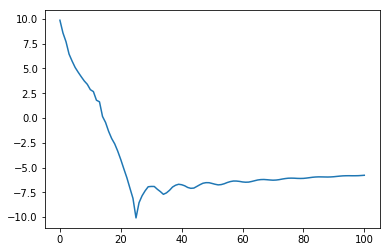

In [21]:
plt.plot(np.log(np.array(res) - 373.4040155581676))
plt.show()